<a href="https://colab.research.google.com/github/osiristape/laravel-troubleshooting/blob/main/wamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

choose WAMP instead of XAMP


```
Authentication Error: most likely to encounter problems connecting
to localhost/phpmyAdmin using a PHP file.
Authorization Error: Forbidden to use the server
Network Error: "Connection to 127.0.0.1 Failed"
unable to access the proxy of the server.
Factors of error:
1.) Multiple versions of MySQL are installed on a WAMP
server, which can cause an error with the connection using a PHP file.
2.) "caching_sha2_password" is present in the latest version
of MySQL 8.0.2, which requires a generated password to secure
a server. It requires a SQL command to make the password set
as permanent so that the server will recognize the password
that has been saved.
3.) In continuation of No. 2, changing a password using a
phpmyadmin site is not recommended since it can't really
recognize the WAMP server unless it is set to "NEVER EXPIRE."

Solution:
1.) If you already changed your password in the phpmyadmin
site and it automatically logs you out as you enter the password,
you can't recognize it since it is expired according to the server.
- Use the MySQL console to change your password (use the default password).
- observe "config.inc.php." and modify it in the VSCODE to bypass the server.
(For example, if you have MariaDB installed on your WAMP server,
you can use it as an alternative to gain access to MySQL.)
2.) Degrading the version of your MySQL to 5.7.28 can be less
hassle since it doesn't require a "caching_sha2_password."
3.) Re-installing the WAMP server is also a good solution to
reduce the multiple versions of MySQL as a simple approach for
fixing this kind of troubleshooting. However, you must backup
all your important files before you uninstall the WAMP server.



```



authentication error
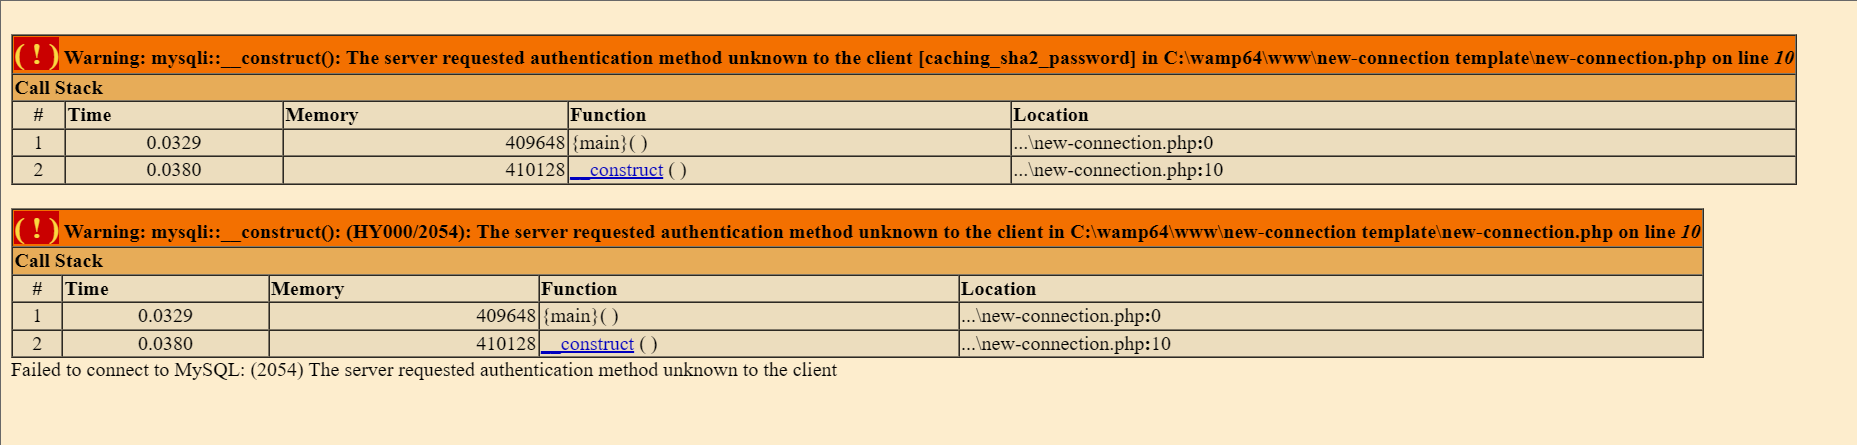

authorization error
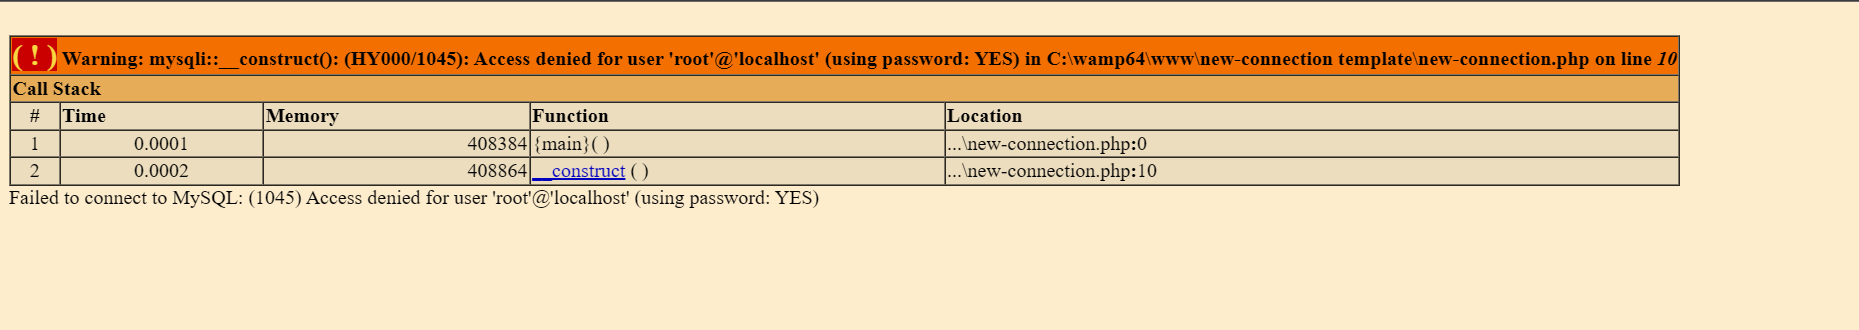



new_connection.php
```
<?php
/*--------------------BEGINNING OF THE CONNECTION PROCESS------------------*/
//define constants for db_host, db_user, db_pass, and db_database
//adjust the values below to match your database settings
define('DB_HOST', 'localhost');
define('DB_USER', 'root');
define('DB_PASS', ''); //may need to set DB_PASS as 'root'
define('DB_DATABASE', 'dfsdtrwt'); //make sure to set your database
//connect to database host
$connection = new mysqli(DB_HOST, DB_USER, DB_PASS, DB_DATABASE);
//make sure connection is good or die
if($connection->connect_errno){
  die("Failed to connect to MySQL: (" . $connection->connect_errno . ") " . $connection->connect_error);
}
/*-----------------------END OF CONNECTION PROCESS------------------------*/
/*----------------------DATABASE QUERYING FUNCTIONS-----------------------*/
//SELECT - used when expecting single OR multiple results
//returns an array that contains one or more associative arrays
function fetch_all($query)
{
  $data = array();
  global $connection;
  $result = $connection->query($query);
  while($row = mysqli_fetch_assoc($result))
  {
    $data[] = $row;
  }
  return $data;
}
//SELECT - used when expecting a single result
//returns an associative array
function fetch_record($query)
{
  global $connection;
  $result = $connection->query($query);
  return mysqli_fetch_assoc($result);
}
//used to run INSERT/DELETE/UPDATE, queries that don't return a value
//returns a value, the id of the most recently inserted record in your database
function run_mysql_query($query)
{
  global $connection;
  $result = $connection->query($query);
  return $connection->insert_id;
}
//returns an escaped string. EG, the string "That's crazy!" will be returned as "That\'s crazy!"
//also helps secure your database against SQL injection
function escape_this_string($string)
{
  global $connection;
  return $connection->real_escape_string($string);
}
?>
```

